In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("file:///F:/test_scores.csv")
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [3]:
pd.crosstab(df['school_setting'],df['school_type'],normalize='index')

school_type,Non-public,Public
school_setting,,
Rural,0.190196,0.809804
Suburban,0.269177,0.730823
Urban,0.288079,0.711921


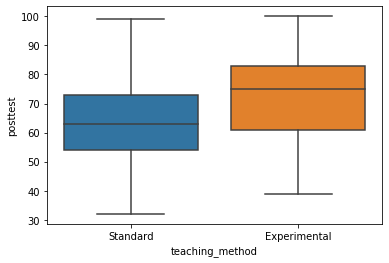

In [4]:
sns.boxplot(data=df, x='teaching_method', y='posttest')

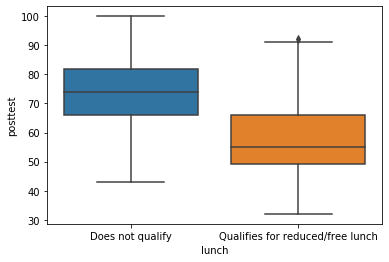

In [5]:
sns.boxplot(data=df, x='lunch', y='posttest')

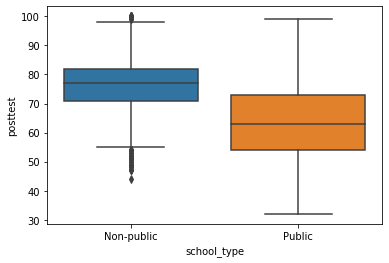

In [6]:
sns.boxplot(data=df, x='school_type', y='posttest')

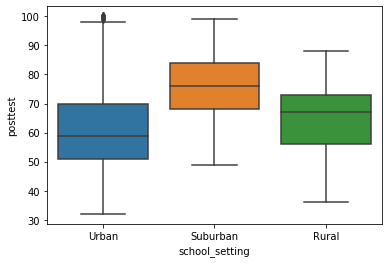

In [7]:
sns.boxplot(data=df, x='school_setting', y='posttest')

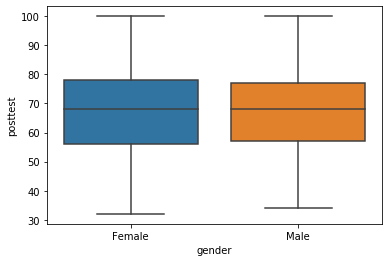

In [8]:
sns.boxplot(data=df, x='gender', y='posttest')

In [9]:
post_desc = df['posttest'].describe()
pre_desc = df['pretest'].describe()

dif=post_desc-pre_desc
dif


count     0.000000
mean     12.146273
std       0.423687
min      10.000000
25%      12.000000
50%      12.000000
75%      12.000000
max       7.000000
dtype: float64

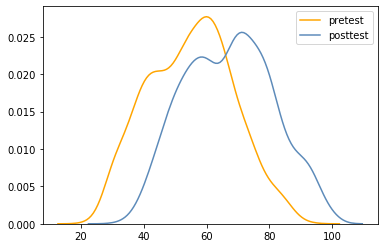

In [10]:
sns.kdeplot(df['pretest'],color='orange')
sns.kdeplot(df['posttest'],color='#5D8BBA')
plt.legend()

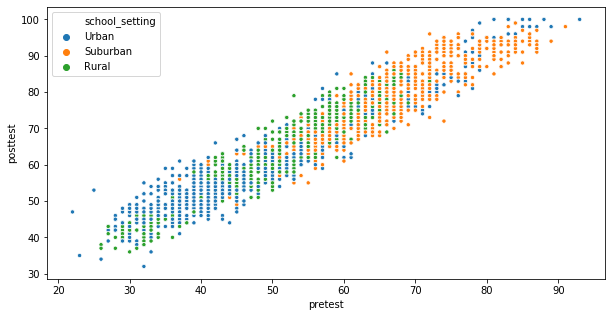

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='pretest',y='posttest', hue='school_setting', s=18)

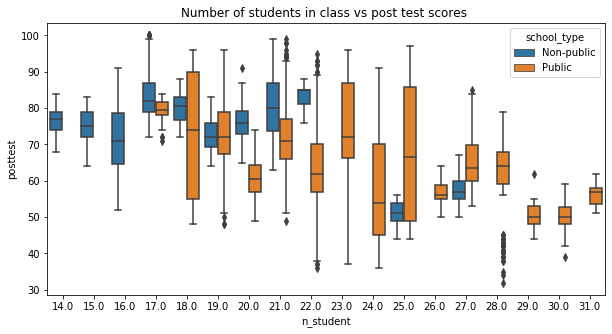

In [12]:
plt.figure(figsize=(10,5))
plt.title('Number of students in class vs post test scores ')
sns.boxplot(data=df, x='n_student', y='posttest', hue='school_type')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


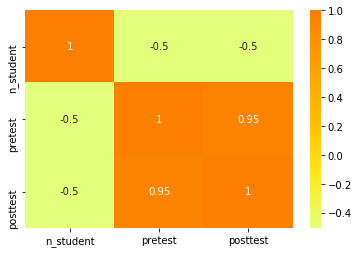

In [14]:

#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Wistia')

In [15]:
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_student,2133.0,22.796531,4.228893,14.0,20.0,22.0,27.0,31.0
pretest,2133.0,54.955931,13.563101,22.0,44.0,56.0,65.0,93.0
posttest,2133.0,67.102203,13.986789,32.0,56.0,68.0,77.0,100.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC11DCEB08>,
      dtype=object)

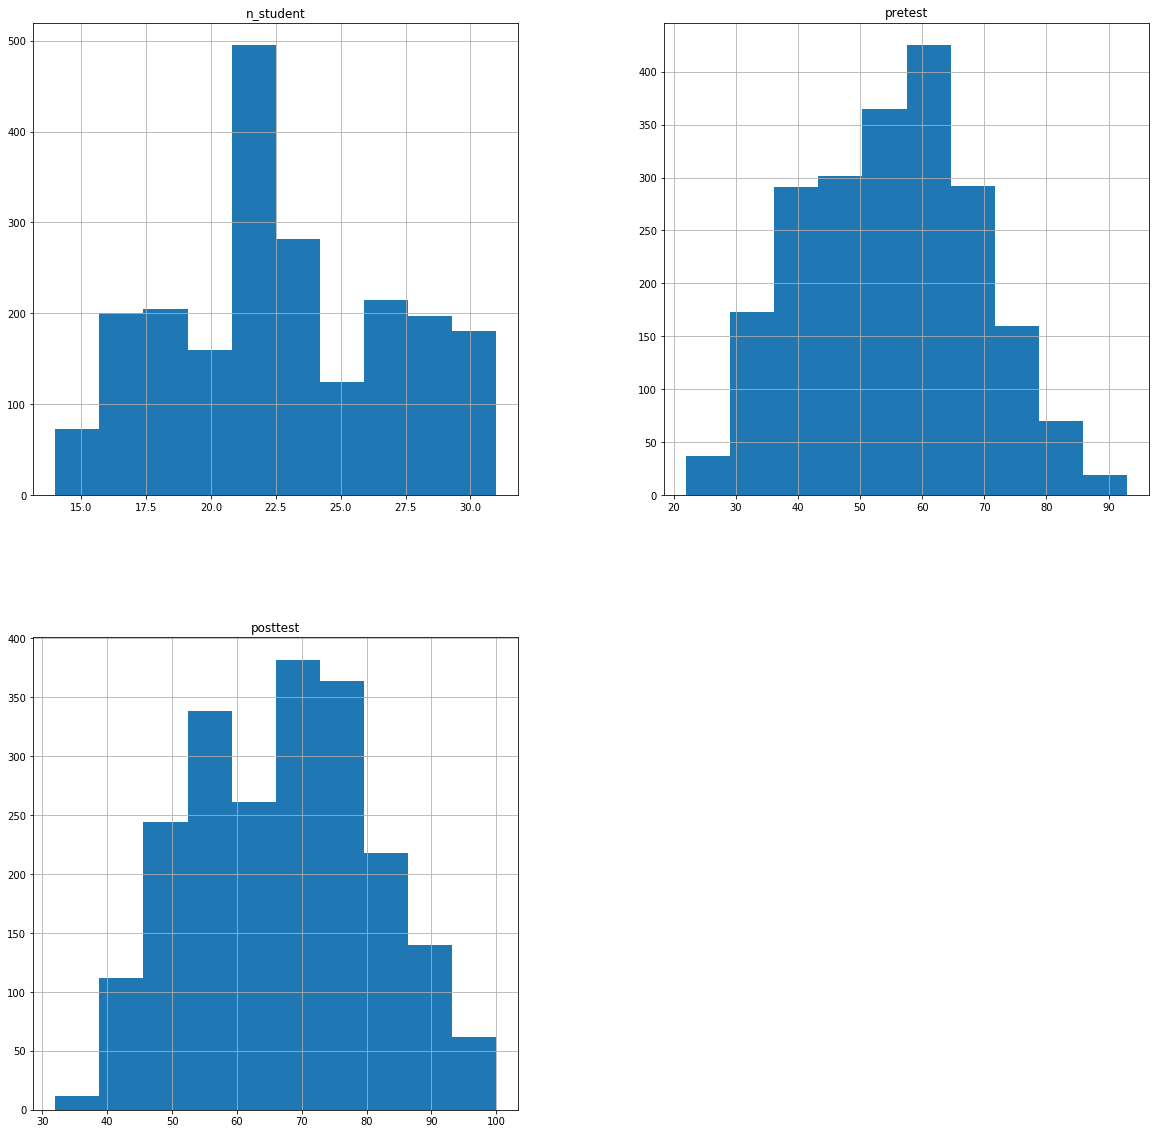

In [17]:
df.hist(figsize=(20,20))

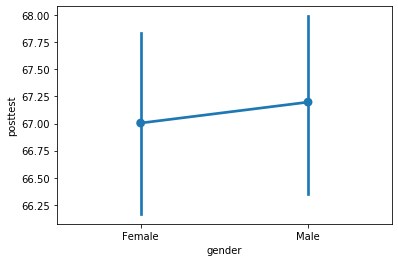

In [18]:
sns.pointplot(x="gender",y="posttest",data=df)

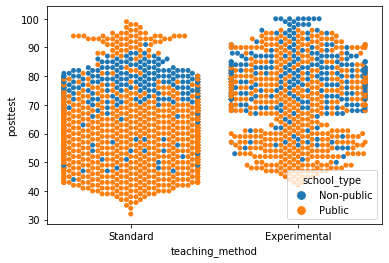

In [19]:
sns.swarmplot(x="teaching_method",y="posttest",data=df,hue="school_type")

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [21]:
xl = df[['pretest']]
yl = df[['posttest']]

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(xl,yl,test_size=0.3)

In [23]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pre_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pre_lo)
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.0609375

In [24]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

        34.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         1
        38.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         4
        40.0       0.00      0.00      0.00         3
        41.0       0.00      0.00      0.00         5
        42.0       0.00      0.00      0.00         5
        43.0       0.00      0.00      0.00         5
        44.0       0.00      0.00      0.00         4
        45.0       0.00      0.00      0.00         7
        46.0       0.00      0.00      0.00         6
        47.0       0.00      0.00      0.00        14
        48.0       0.06      0.67      0.11         6
        49.0       0.00      0.00      0.00        13
        50.0       0.00      0.00      0.00        10
        51.0       0.00      0.00      0.00        16
        52.0       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knc=KNeighborsClassifier()
knc.fit(xtrain,ytrain)
pre_knc=knc.predict(xtest)
accu_knc=accuracy_score(ytest,pre_knc)
accu_knc

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.059375

In [27]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

        34.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         1
        38.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         4
        40.0       0.00      0.00      0.00         3
        41.0       0.00      0.00      0.00         5
        42.0       0.00      0.00      0.00         5
        43.0       0.00      0.00      0.00         5
        44.0       0.00      0.00      0.00         4
        45.0       0.00      0.00      0.00         7
        46.0       0.00      0.00      0.00         6
        47.0       0.00      0.00      0.00        14
        48.0       0.06      0.67      0.11         6
        49.0       0.00      0.00      0.00        13
        50.0       0.00      0.00      0.00        10
        51.0       0.00      0.00      0.00        16
        52.0       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pre_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pre_tre)
accu_tre

0.075

In [29]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

        34.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         1
        38.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         4
        40.0       0.00      0.00      0.00         3
        41.0       0.00      0.00      0.00         5
        42.0       0.00      0.00      0.00         5
        43.0       0.00      0.00      0.00         5
        44.0       0.00      0.00      0.00         4
        45.0       0.00      0.00      0.00         7
        46.0       0.00      0.00      0.00         6
        47.0       0.00      0.00      0.00        14
        48.0       0.06      0.67      0.11         6
        49.0       0.00      0.00      0.00        13
        50.0       0.00      0.00      0.00        10
        51.0       0.00      0.00      0.00        16
        52.0       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
pre_rfc=rfc.predict(xtest)
accu_rfc=accuracy_score(ytest,pre_rfc)
accu_rfc

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.0765625

In [32]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

        34.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         1
        38.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         4
        40.0       0.00      0.00      0.00         3
        41.0       0.00      0.00      0.00         5
        42.0       0.00      0.00      0.00         5
        43.0       0.00      0.00      0.00         5
        44.0       0.00      0.00      0.00         4
        45.0       0.00      0.00      0.00         7
        46.0       0.00      0.00      0.00         6
        47.0       0.00      0.00      0.00        14
        48.0       0.06      0.67      0.11         6
        49.0       0.00      0.00      0.00        13
        50.0       0.00      0.00      0.00        10
        51.0       0.00      0.00      0.00        16
        52.0       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)
pre_mnb=mnb.predict(xtest)
accu_mnb=accuracy_score(ytest,pre_mnb)
accu_mnb

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0203125

In [35]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

        34.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         1
        38.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         4
        40.0       0.00      0.00      0.00         3
        41.0       0.00      0.00      0.00         5
        42.0       0.00      0.00      0.00         5
        43.0       0.00      0.00      0.00         5
        44.0       0.00      0.00      0.00         4
        45.0       0.00      0.00      0.00         7
        46.0       0.00      0.00      0.00         6
        47.0       0.00      0.00      0.00        14
        48.0       0.06      0.67      0.11         6
        49.0       0.00      0.00      0.00        13
        50.0       0.00      0.00      0.00        10
        51.0       0.00      0.00      0.00        16
        52.0       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
pre_gnb=gnb.predict(xtest)
accu_gnb=accuracy_score(ytest,pre_gnb)
accu_gnb

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0875

In [38]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

        34.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         1
        38.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         4
        40.0       0.00      0.00      0.00         3
        41.0       0.00      0.00      0.00         5
        42.0       0.00      0.00      0.00         5
        43.0       0.00      0.00      0.00         5
        44.0       0.00      0.00      0.00         4
        45.0       0.00      0.00      0.00         7
        46.0       0.00      0.00      0.00         6
        47.0       0.00      0.00      0.00        14
        48.0       0.06      0.67      0.11         6
        49.0       0.00      0.00      0.00        13
        50.0       0.00      0.00      0.00        10
        51.0       0.00      0.00      0.00        16
        52.0       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN',  'Decision Tree Classifier',
             'Random Forest','MultinomialNB','GaussianNB'],
    'Score': [ accu_lo,accu_knc, accu_tre, accu_rfc, accu_mnb,accu_gnb]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,GaussianNB,0.087500
3,Random Forest,0.076563
2,Decision Tree Classifier,0.075000
0,Logistic,0.060937
1,KNN,0.059375
4,MultinomialNB,0.020313


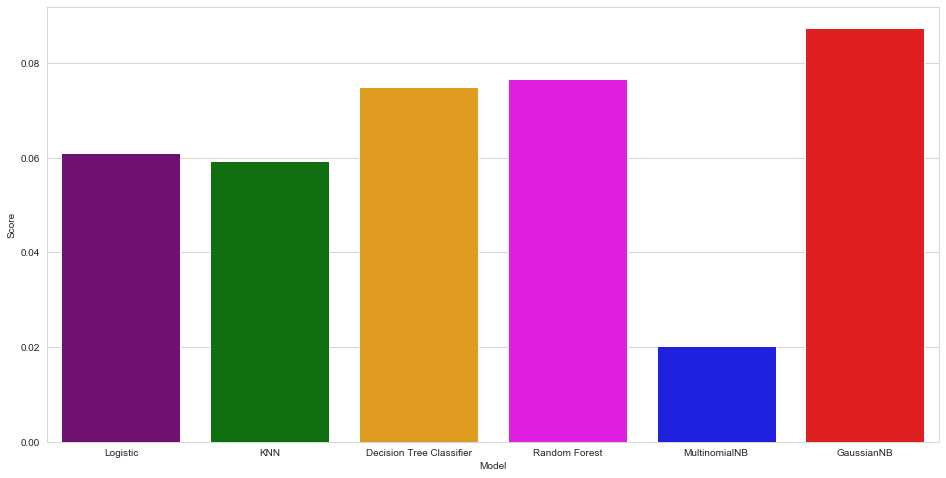

In [40]:
colors = ["purple", "green", "orange", "magenta","blue","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [41]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [42]:
df.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest'],
      dtype='object')

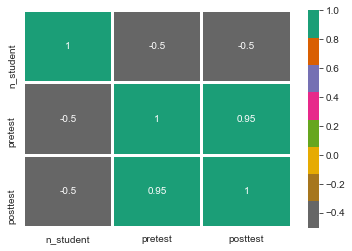

In [43]:

#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [44]:
import sweetviz as sv

In [45]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [46]:
from IPython.display import IFrame

In [47]:
IFrame(src='Analyze.html',width=1000,height=600)

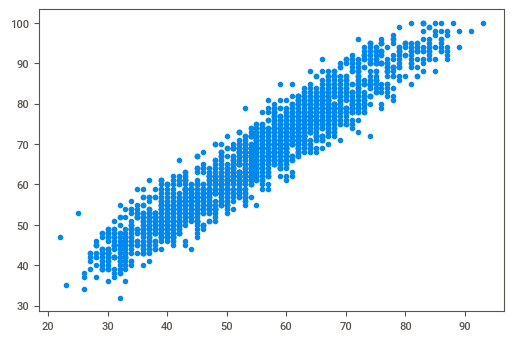

In [48]:
plt.scatter(df[['pretest']],df['posttest'])

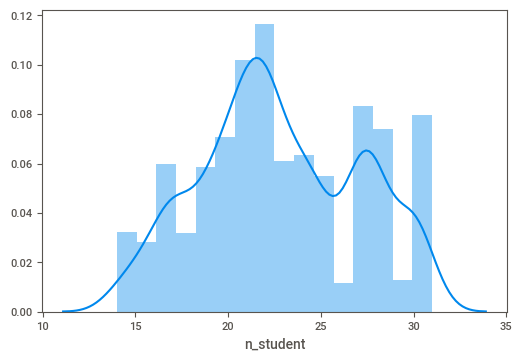

In [49]:
sns.distplot(df['n_student'])

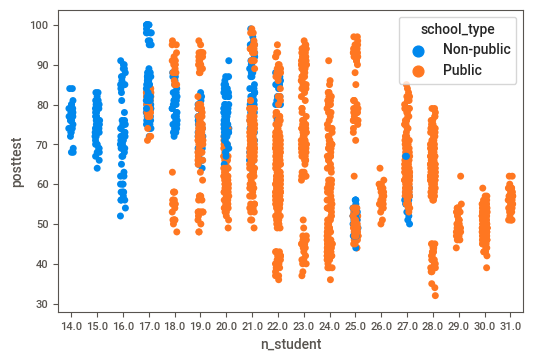

In [50]:
sns.stripplot(x="n_student",y="posttest",data=df,hue="school_type")

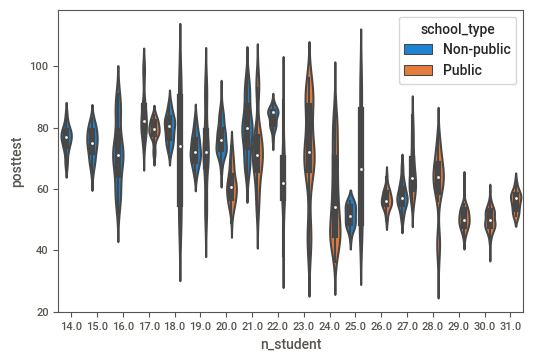

In [51]:
sns.violinplot(x="n_student",y="posttest",data=df,hue="school_type")

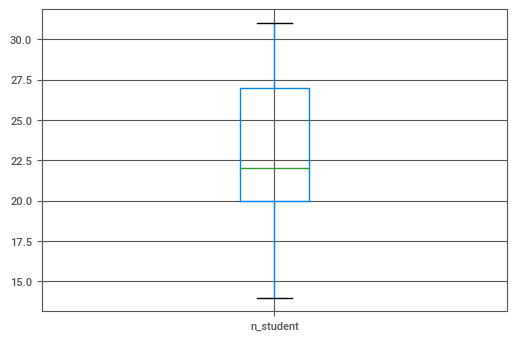

In [52]:
df.boxplot(column='n_student')

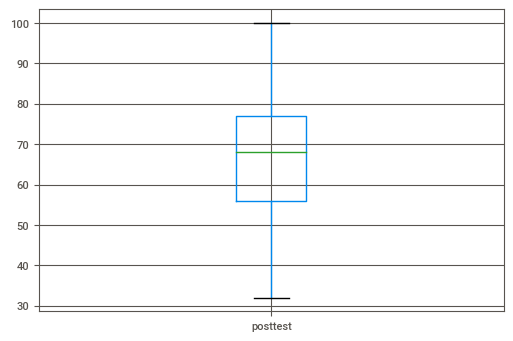

In [53]:
df.boxplot(column='posttest')

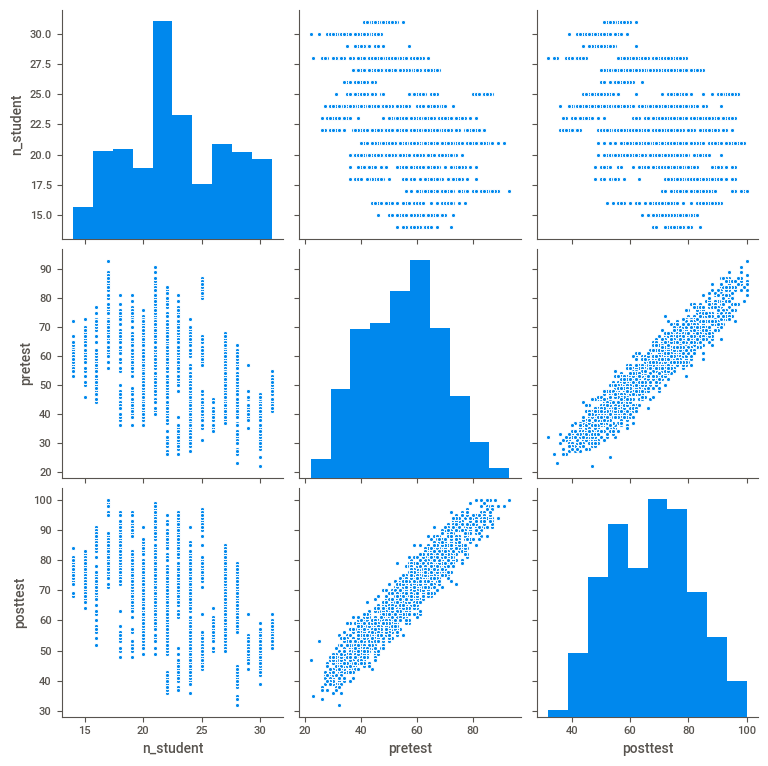

In [56]:
sns.pairplot(data=df)